In [30]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,8

In [31]:
dataset = pd.read_csv("KIDNAPPING_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [32]:
from datetime import datetime
indexedDataset

,Kidnapping and Abduction
Year,
2001,14645
2002,14506
2003,13296
2004,15578
2005,15750
2006,17414
2007,20416
2008,22939
2009,25741


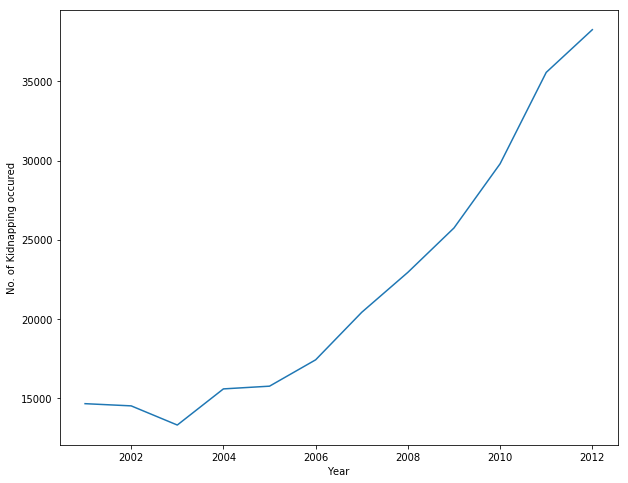

In [33]:
plt.xlabel("Year")
plt.ylabel("No. of Kidnapping occured")
plt.plot(indexedDataset)

In [34]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

      Kidnapping and Abduction
Year                          
2001                       NaN
2002                   14575.5
2003                   13901.0
2004                   14437.0
2005                   15664.0
2006                   16582.0
2007                   18915.0
2008                   21677.5
2009                   24340.0
2010                   27768.0
2011                   32680.0
2012                   36913.5       Kidnapping and Abduction
Year                          
2001                       NaN
2002                 98.287843
2003                855.599205
2004               1613.617675
2005                121.622366
2006               1176.625684
2007               2122.734557
2008               1784.030409
2009               1981.313201
2010               2866.610891
2011               4080.006127
2012               1907.066989


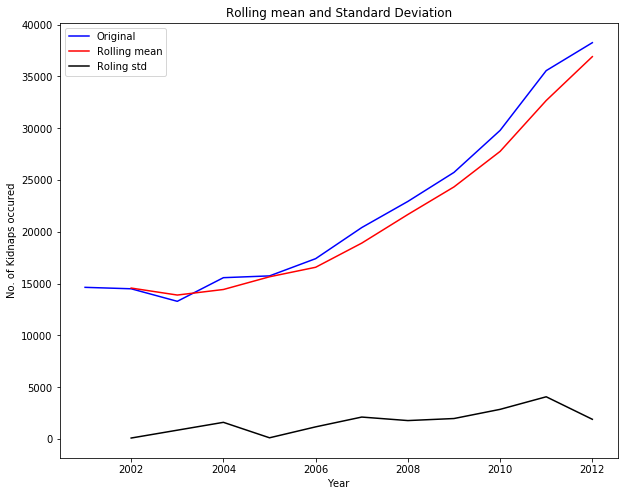

In [85]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)



In [36]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Kidnapping and Abduction'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                  0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Text(0,0.5,'No. of Kidnaps occured')

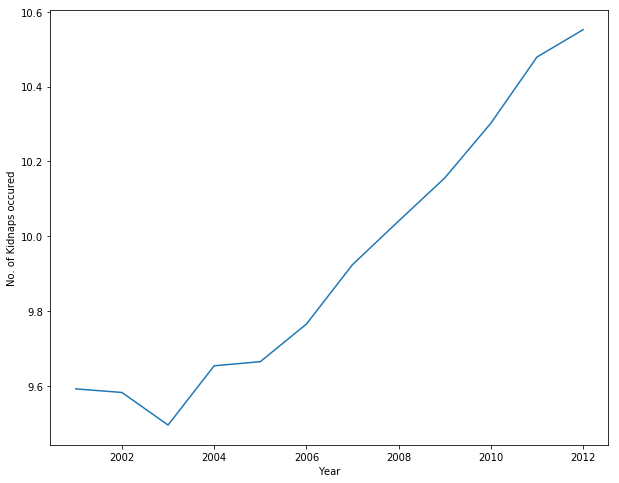

In [83]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

Text(0,0.5,'No. of Kidnaps occured')

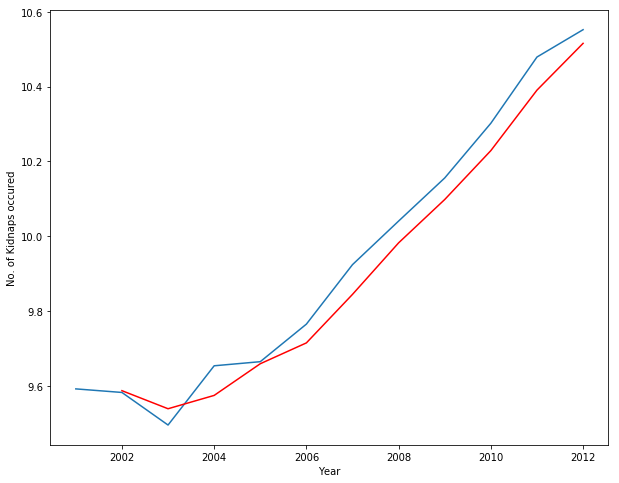

In [82]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
#over here as well the data is not stationary the mean keeps changing according to the time

In [39]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Kidnapping and Abduction
Year,
2002,-0.004768
2003,-0.043550
2004,0.079198
2005,0.005490
2006,0.050217
2007,0.079522
2008,0.058260
2009,0.057623
2010,0.073128


In [79]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Kidnapping and Abduction'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

IndentationError: unexpected indent (<ipython-input-79-946623aae345>, line 16)

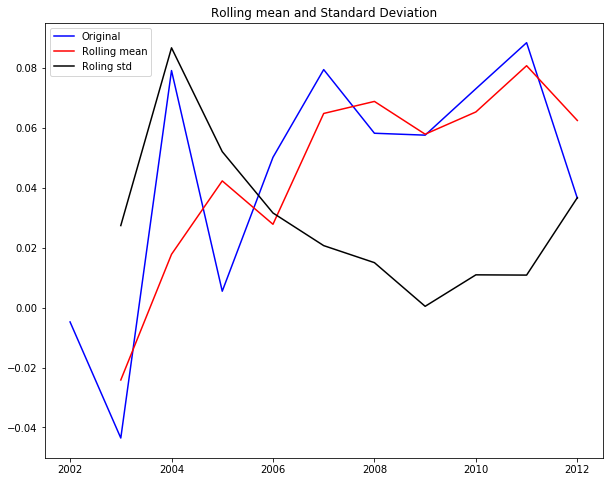

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [80]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Text(0,0.5,'No. of Kidnaps occured')

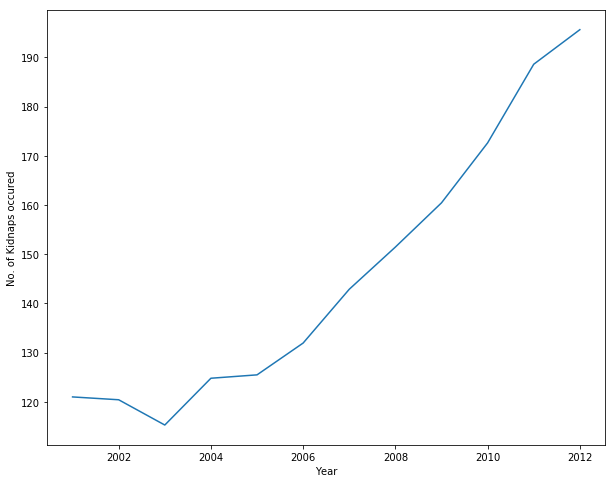

In [81]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

Text(0,0.5,'No. of Kidnaps occured')

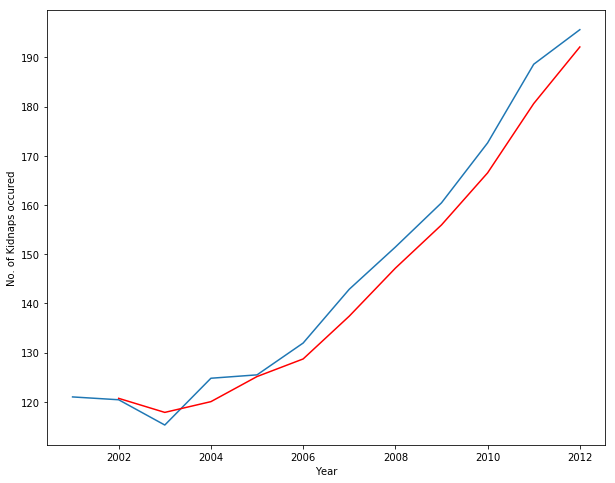

In [77]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

In [45]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Kidnapping and Abduction
Year,
2002,-0.287835
2003,-2.566287
2004,4.751788
2005,0.343573
2006,3.231556
2007,5.461227
2008,4.285848
2009,4.491878
2010,6.086131


Text(0,0.5,'No. of Kidnaps occured')

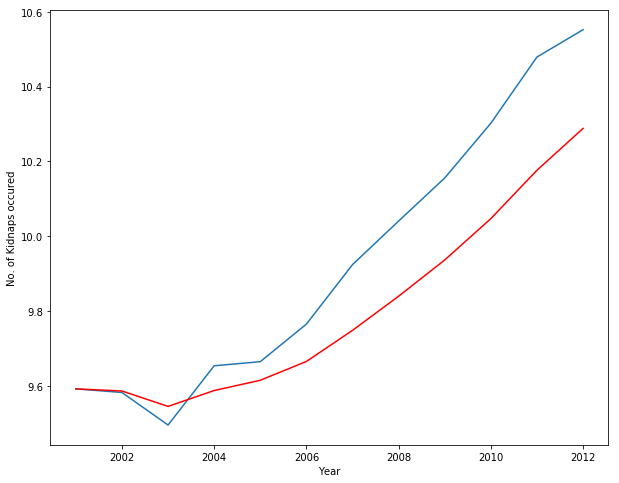

In [76]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Kidnapping and Abduction'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

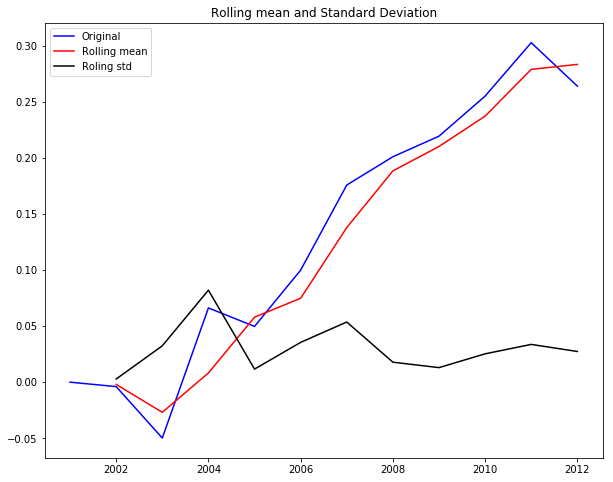

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [49]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Text(0,0.5,'No. of Kidnaps occured')

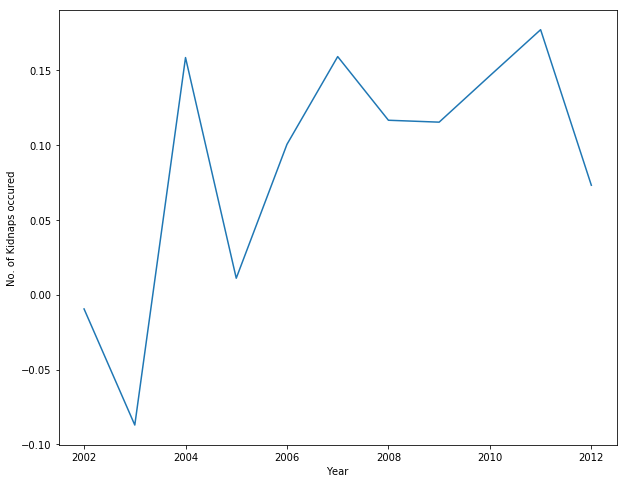

In [75]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

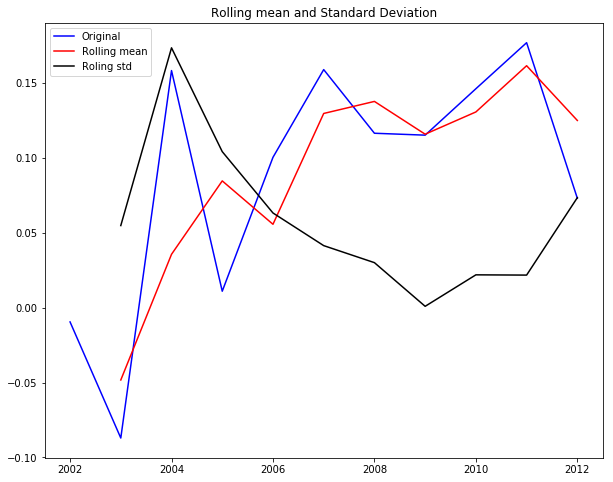

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [51]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

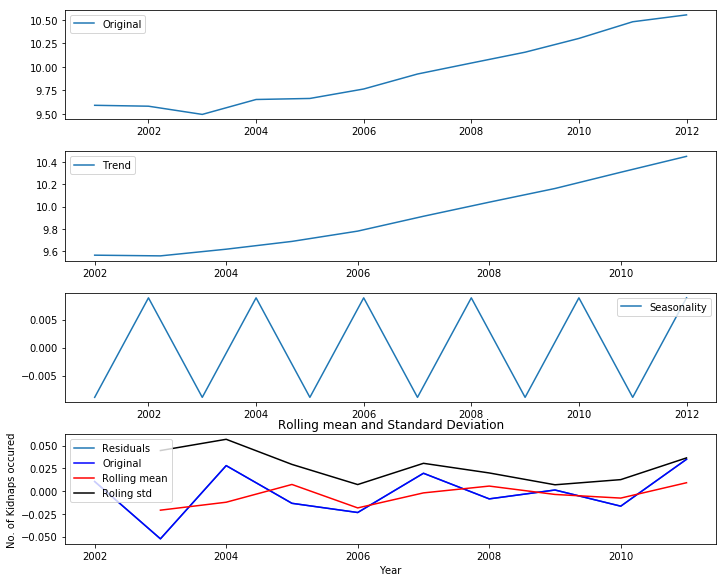

Results of dickey-fuller test:
Test statstic                 -3.910875
p-value                        0.001956
#Lags Used                     1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


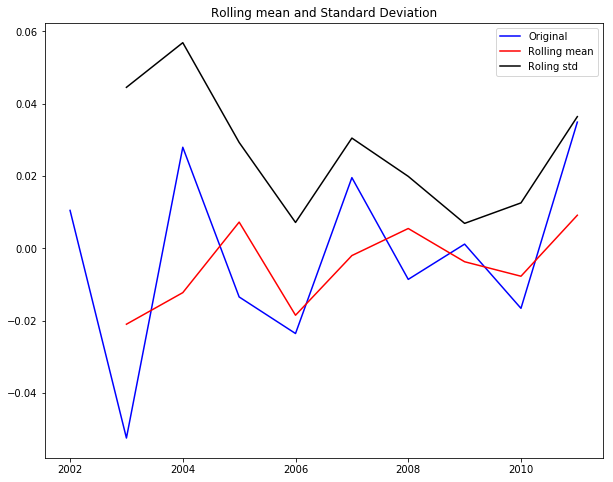

Results of dickey-fuller test:
Test statstic                 -3.910875
p-value                        0.001956
#Lags Used                     1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [73]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


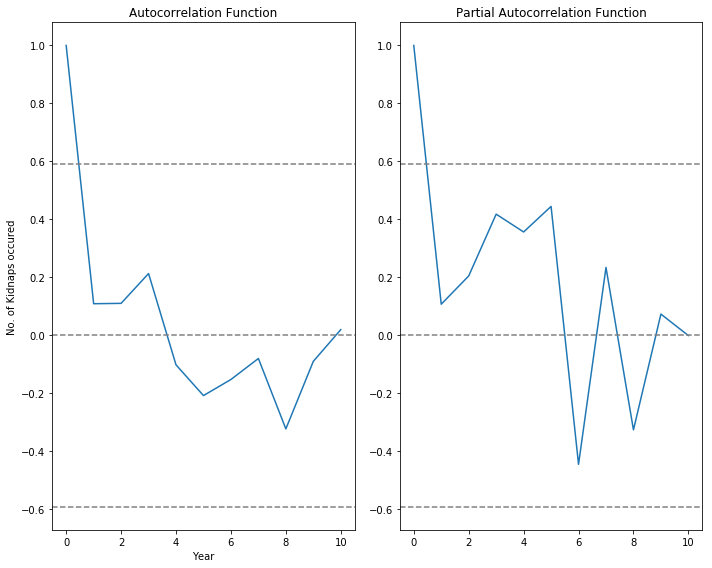

In [71]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


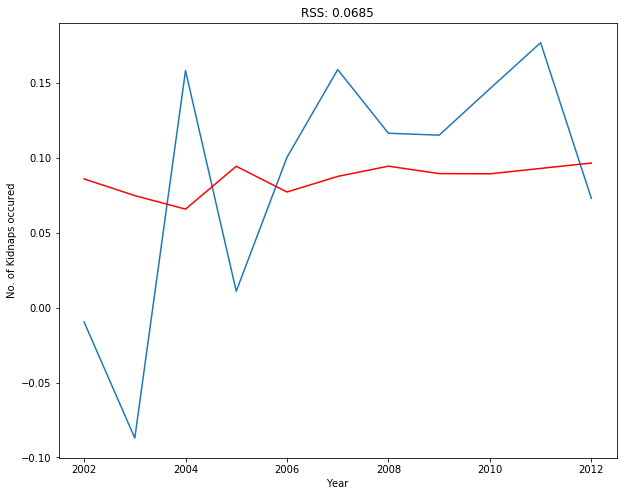

In [68]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(1,1,0)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Kidnapping and Abduction"])**2))
print('Plotting AR model')

Plotting AR model


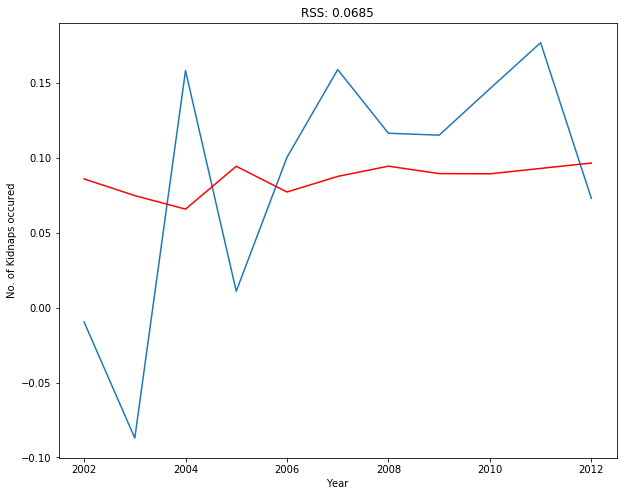

In [67]:
#MA Model
model = ARIMA(indexedDataset_logScale, order= (1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Kidnapping and Abduction"])**2))
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")
print('Plotting AR model')


Text(0,0.5,'No. of Kidnaps occured')

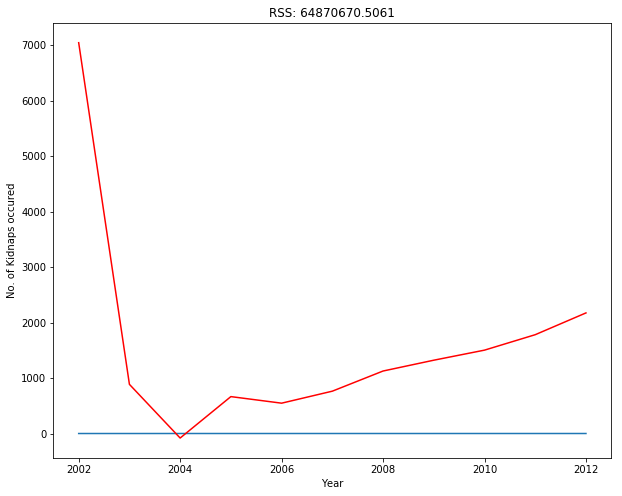

In [66]:
model = ARIMA(indexedDataset, order = (1, 1 ,1))
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Kidnapping and Abduction'])**2))
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")


In [59]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002    7042.423708
2003     885.928105
2004     -81.507059
2005     664.907792
2006     546.604598
dtype: float64


In [60]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002     7042.423708
2003     7928.351814
2004     7846.844754
2005     8511.752547
2006     9058.357145
2007     9821.239670
2008    10947.233369
2009    12268.163281
2010    13770.452878
2011    15551.116577
2012    17724.181250
dtype: float64


In [61]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Kidnapping and Abduction'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001       9.591854
2002    7052.015563
2003    7937.943668
2004    7856.436608
2005    8521.344401
dtype: float64

Text(0,0.5,'No. of Kidnaps occured')

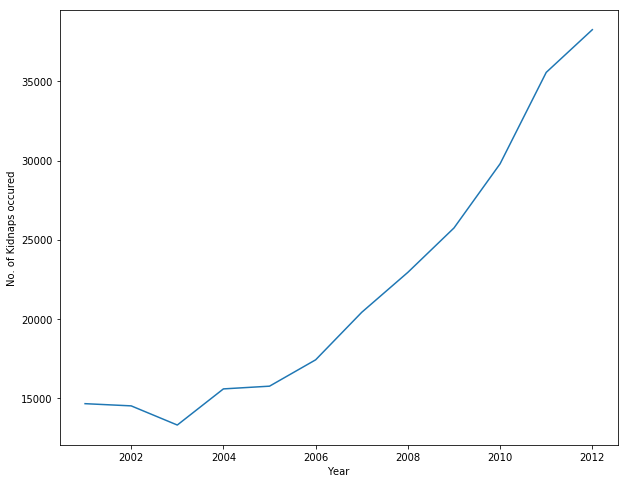

In [65]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

#orange line is the model that we have fitted 

In [63]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Kidnapping and Abduction
Year,
2001,9.591854
2002,9.582318
2003,9.495219
2004,9.653615
2005,9.664596
2006,9.765030
2007,9.924074
2008,10.040594
2009,10.155840


Text(0,0.5,'No. of Kidnaps occured')

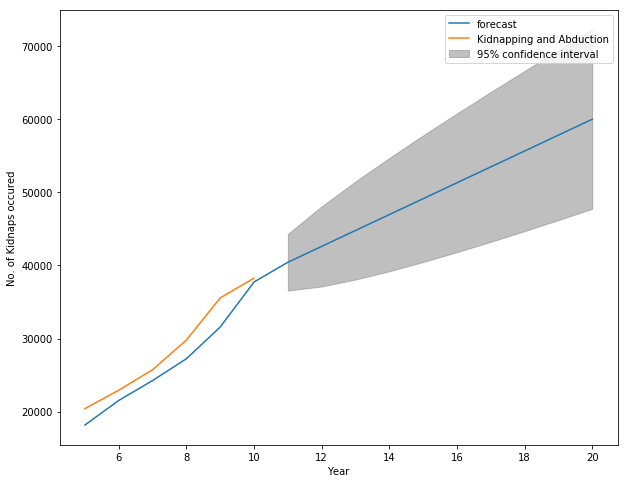

In [64]:
results_ARIMA.plot_predict(6,21)
plt.xlabel("Year")
plt.ylabel("No. of Kidnaps occured")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv("2013.csv") 
ds

,Crimes,Rate
0,Rape,33707
1,Kidnapping and Abduction,51881
2,Dowry Deaths,8083
3,Assault on women with intent to outrage her mo...,70739
4,Insult to modesty of Women,12589
5,Cruelty by Husband or his Relatives,118866
6,Importation of Girls,31


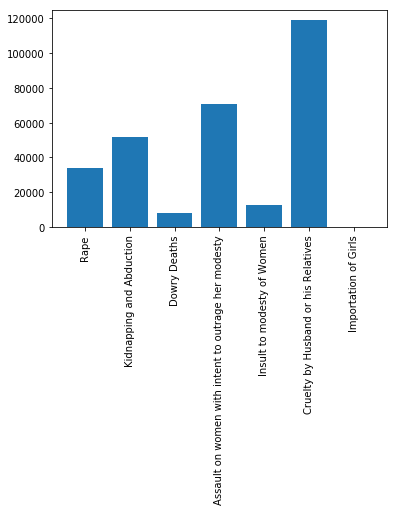

In [2]:
# Make a fake dataset:
height = ds.Rate
bars = ds.Crimes
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars , rotation=90)

# Show graphic
plt.show()